# Data Analysis End to End

## **<u> Motivaciones para la elección del dataset </u>**

**<u> Orígen y autoría </u>**

El dataset seleccionado, titulado *'Students Performance Dataset: Academic Success Factors in High School Students'*, ha sido obtenido de Kaggle. El dataset específico se puede encontrar en la URL 'https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data', y fue creado por Rabie El Kharoua, quien tiene una amplio abanico de datasets en la plataforma, todos ellos de gran calidad.

**<u> Razones para seleccionar este dataset </u>**

Este dataset es una gran herramienta para explorar y comprender los factores que ingluyen en el rendimiento académico de los estudiantes de secundaria. Poder identificar tales factores no solo enriquece el entendimiento teórico, sino que también tiene aplicaciones prácticas. Como educador esta información puede utilizarse para desarrollar estrategias basadas en datos para promover el éxtio académico de jovenes estudiantes.

**<u> Beneficios y contribuciones esperadas </u>**

El estudio de este dataset proporcionará insights para poder orientar a los estudiantes de manera correcta y efectiva en su trayectoria académica.

**<u> Conclusión </u>**

La elección de este dataset se fundamenta en la necesidad de entender mejor los factores que impulsan el éxito académico entre los estudiantes de secundaria. Este conocimiento no solo tiene aplicaciones teóricas, sino que también tiene el potencial de impactar positivamente en la educación de los jovenes de nuestro entorno.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [211]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [213]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [214]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## **<u> Descripción de las variables </u>**

<u> Información del estudiante </u>

* **StudentID**: Número de identificación único de cada estudiante (1001 hasta 3392) *(Categórica, nominal, politómica)*

<u> Información demográfica </u>

* **Age**: Edad de los estudiantes en años enteros entre 15 y 18 *(Númerica, discreta, razón)*
* **Gender**: Genero *(Categórica, nominal, dicotómica)*
  * 0 -> hombre 
  * 1 -> mujer
* **Ethnicity**: Étnia de los estudiantes *(Categórica, nominal, politómica)*
  * 0 -> Caucasian
  * 1 -> African American
  * 2 -> Asian
  * 3 -> Other
* **ParentalEducation**: El nivel de educación de los padres *(Categórica, ordinal, politómica)*
  * 0 -> None
  * 1 -> High School
  * 2 -> Some College
  * 3 -> Bachelor's
  * 4 -> Higher

<u> Hábitos de estudio </u>

* **StudyTimeWeekly**: Horas de estudio semanal en horas con decimales entre 0 y 20 *(Númerica, continua, intervalo)*
* **Absences**: Numero de absencias en dias enteros entre 0 y 30 *(Númerica, discreta, razón)*
* **Tutoring**: El alumno esta 'tutoreado' *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si

<u> Participación de los padres </u>

* **ParentalSupport**: Nivel de participación de los padres *(Categórica, ordinal, politómica)*
  * 0 -> None
  * 1 -> Low
  * 2 -> Moderate
  * 3 -> High
  * 4 -> Very High

<u> Actividades extracurriculares </u>

* **Extracurricular**: Participación en actividades extracurriculares *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si
* **Sports**: Práctica de deporte *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si
* **Music**: Práctica de música *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si
* **Volunteering**: Práctica de voluntariado *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si

<u> Rendimiento académico </u>

* **GPA**: Siglas para 'Grade Point Average' que es la media de una puntuación entre 2.0 y 4.0, influenciada por los hábitos de estudio, la participación de los padres y las actividades extracurriculares *(Númerica, continua, intervalo)*

<u> Variable objetivo </u>

* **GradeClass**: Clasificación de los estudiantes basada en el GPA *(Categórica, ordinal, politómica)*
  * 0 -> 'A' (GPA >= 3.5)
  * 1 -> 'B' (3.0 <= GPA < 3.5)
  * 2 -> 'C' (2.5 <= GPA < 3.0)
  * 3 -> 'D' (2.0 <= GPA < 2.5)
  * 4 -> 'F' (GPA < 2.0)
  


## **<u> Tratamiento de las variables </u>**

#### **Conteo y tasa de alumnos**

In [215]:
# Conteo del numero de alumnos por cada grado
numero_total_alumnos = df['StudentID'].count()
numero_alumnos_por_grado = df['GradeClass'].value_counts().sort_index()
tasa_alumnos_por_grado = (numero_alumnos_por_grado / numero_total_alumnos) * 100

print(f"El número total de alumnos es: {numero_total_alumnos}")
print(f"\nEl numero de alumnos por grado es:\n{numero_alumnos_por_grado}")
print(f"\nLa tasa de alumnos por grado es:\n{tasa_alumnos_por_grado}")

El número total de alumnos es: 2392

El numero de alumnos por grado es:
GradeClass
0.0     107
1.0     269
2.0     391
3.0     414
4.0    1211
Name: count, dtype: int64

La tasa de alumnos por grado es:
GradeClass
0.0     4.473244
1.0    11.245819
2.0    16.346154
3.0    17.307692
4.0    50.627090
Name: count, dtype: float64


#### **Separación de las variables númericas y categóricas**

In [216]:
# Creación de dos variables para separar las variables númericas (y 'GradeClass') y las categóricas
variables_numericas = ['StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']
df_numericas = df[variables_numericas]

variables_categoricas = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
df_categoricas = df[variables_categoricas]

print(f"Dataframe con las variables númericas:\n{df_numericas}")
print(f"\nDataframe con las variables categóricas:\n{df_categoricas}")

Dataframe con las variables númericas:
      StudyTimeWeekly  Absences       GPA  GradeClass
0           19.833723         7  2.929196         2.0
1           15.408756         0  3.042915         1.0
2            4.210570        26  0.112602         4.0
3           10.028829        14  2.054218         3.0
4            4.672495        17  1.288061         4.0
...               ...       ...       ...         ...
2387        10.680555         2  3.455509         0.0
2388         7.583217         4  3.279150         4.0
2389         6.805500        20  1.142333         2.0
2390        12.416653        17  1.803297         1.0
2391        17.819907        13  2.140014         1.0

[2392 rows x 4 columns]

Dataframe con las variables categóricas:
      Age  Gender  Ethnicity  ParentalEducation  Tutoring  ParentalSupport  \
0      17       1          0                  2         1                2   
1      18       0          0                  1         0                1   
2      15   

## **<u> Gráficos iniciales </u>**

#### **Variables númericas**

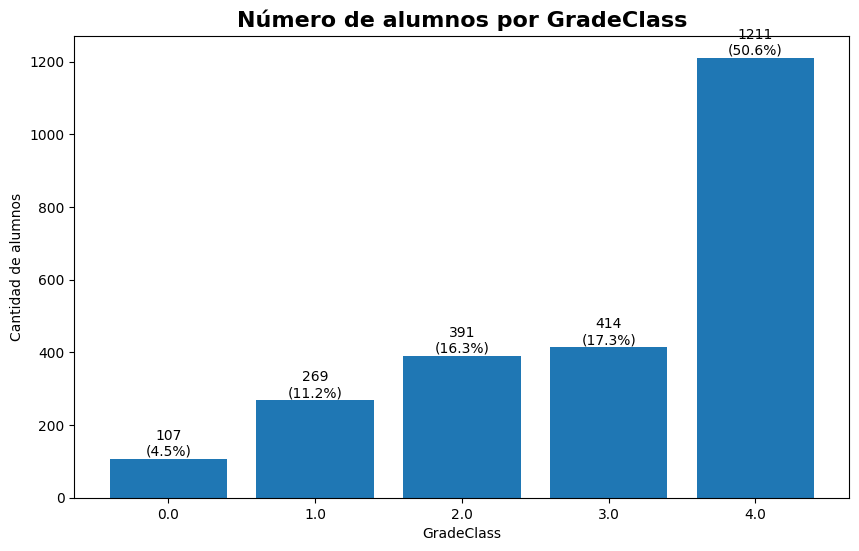

In [217]:
# Gráfico de barras que muestra el número de alumnos en cada grado
plt.figure(figsize=(10, 6))
barras = plt.bar(numero_alumnos_por_grado.index.astype(str), numero_alumnos_por_grado.values)

# Añadir numero y porcentaje encima de cada barra
for barra, grado in zip(barras, numero_alumnos_por_grado.index):
  h = barra.get_height()
  p = tasa_alumnos_por_grado[grado]
  plt.text(barra.get_x() + barra.get_width() / 2, h, f'{h:.0f}\n({p:.1f}%)', ha='center', va='bottom')

plt.xlabel('GradeClass')
plt.ylabel('Cantidad de alumnos')
plt.title('Número de alumnos por GradeClass', fontweight='bold', fontsize=16)

plt.show()

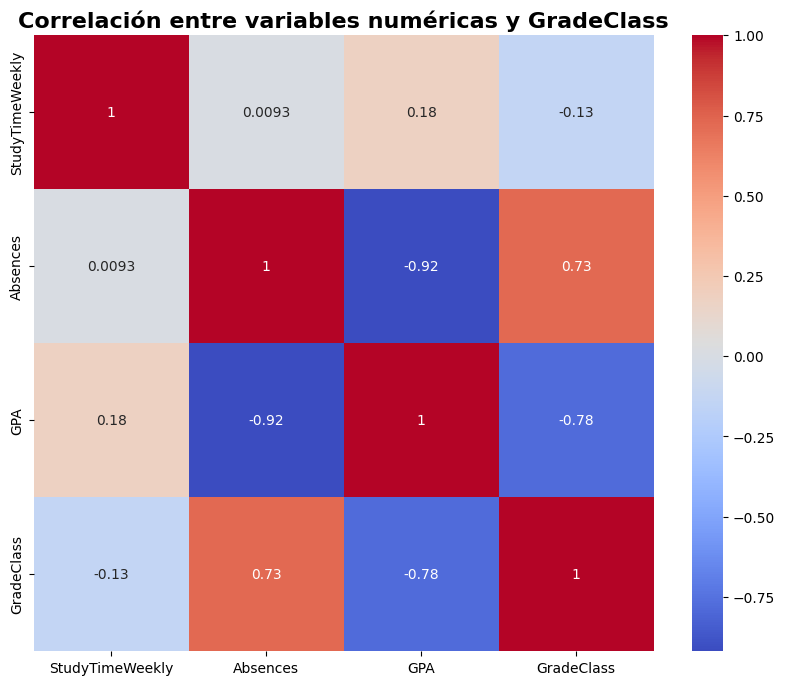

In [218]:
# Gráfico de correlación para las variables númericas vs. GradeClass
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas y GradeClass', fontweight='bold', fontsize=16)
plt.show()
# GradeClass presenta una fuerte relación con Absences

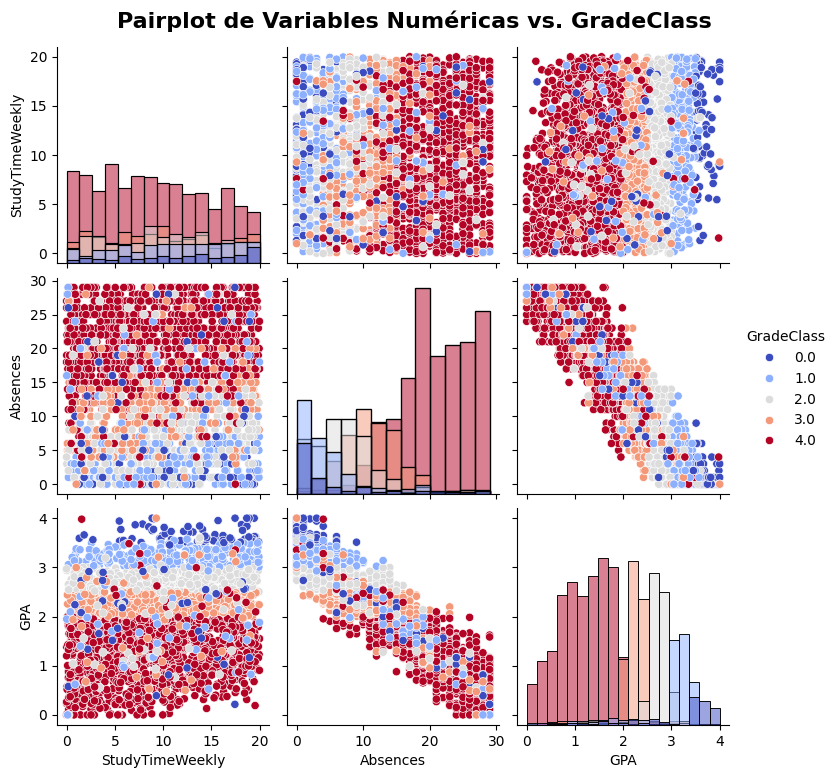

In [219]:
# Crear un pairplot de las variables númericas vs. 'GradeClass'
sns.pairplot(df_numericas, hue='GradeClass', palette='coolwarm', diag_kind='hist')
plt.suptitle('Pairplot de Variables Numéricas vs. GradeClass', y=1.03, fontweight='bold', fontsize=16)
plt.show()

#### **Variables categóricas**

In [220]:
# Crear labels de las variables categoricas para mostrar en los gráficos

# Definir los diccionarios de mapeo
gender_map = {0: 'Hombre', 1: 'Mujer'}
ethnicity_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education_map = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'}
tutoring_map = {0: 'No', 1: 'Si'}
parental_support_map = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular_map = {0: 'No', 1: 'Si'}
sports_map = {0: 'No', 1: 'Si'}
music_map = {0: 'No', 1: 'Si'}
volunteering_map = {0: 'No', 1: 'Si'}

# Copiar el df para no modificar el original
df_graficos = df.copy()
  
# Mapear las variables categóricas
df_graficos['Gender'] = df_graficos['Gender'].map(gender_map)
df_graficos['Ethnicity'] = df_graficos['Ethnicity'].map(ethnicity_map)
df_graficos['ParentalEducation'] = df_graficos['ParentalEducation'].map(parental_education_map)
df_graficos['Tutoring'] = df_graficos['Tutoring'].map(tutoring_map)
df_graficos['ParentalSupport'] = df_graficos['ParentalSupport'].map(parental_support_map)
df_graficos['Extracurricular'] = df_graficos['Extracurricular'].map(extracurricular_map)
df_graficos['Sports'] = df_graficos['Sports'].map(sports_map)
df_graficos['Music'] = df_graficos['Music'].map(music_map)
df_graficos['Volunteering'] = df_graficos['Volunteering'].map(volunteering_map)

# Crear la lista de labels para las variables categóricas
labels_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

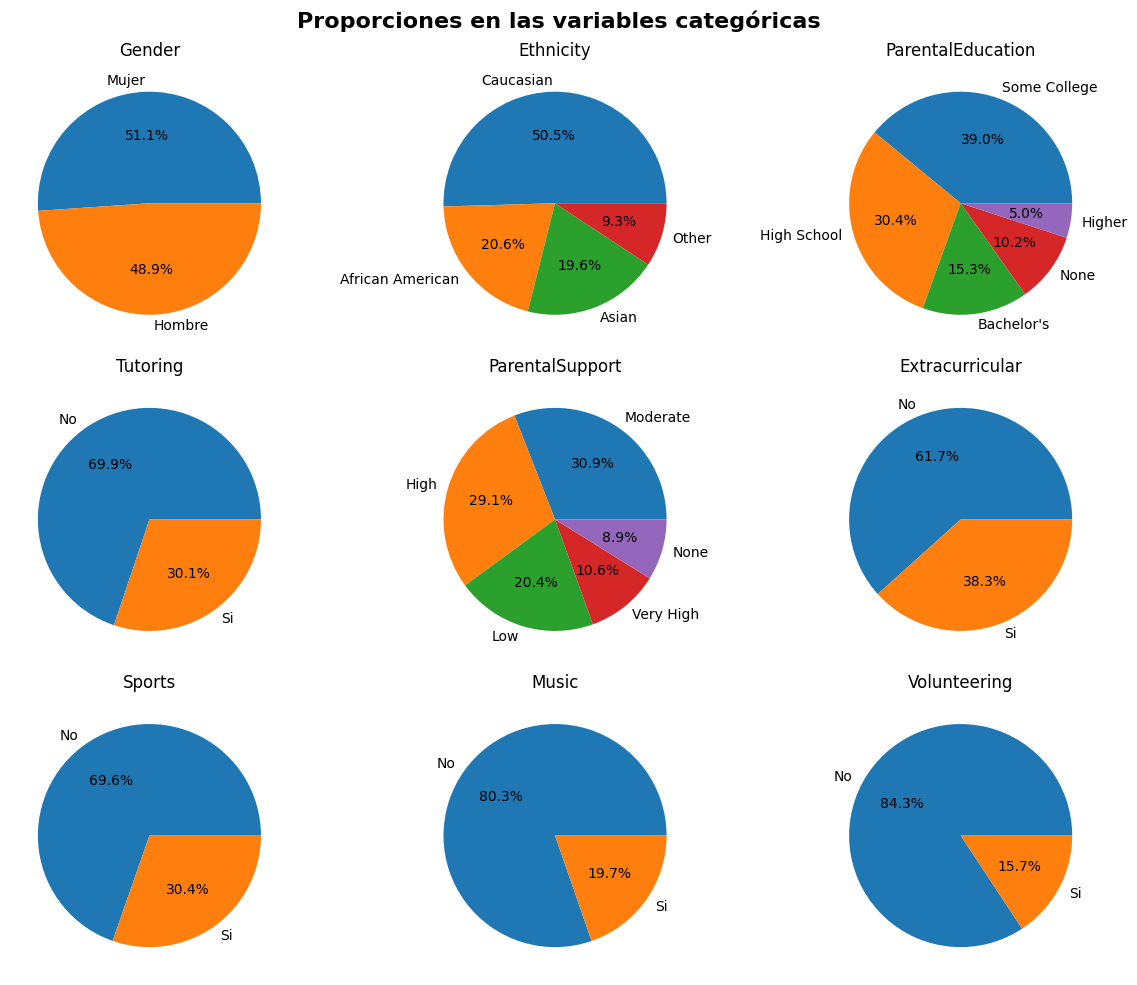

In [221]:
# Crear gráficos de pastel para ver las proporciones de las variables categóricas
fig, ax = plt.subplots(3,3, figsize=(12,10))
fig.suptitle('Proporciones en las variables categóricas', fontweight='bold', fontsize=16)

# Recorrer la lista para ir creando los gráficos
for i, var in enumerate(labels_categoricas):
  fila = i // 3
  col = i % 3
  data = df_graficos[var].value_counts()
  ax[fila, col].pie(data, labels=data.index, autopct='%1.1f%%')
  ax[fila, col].set_title(var)
    
plt.tight_layout()
plt.show()

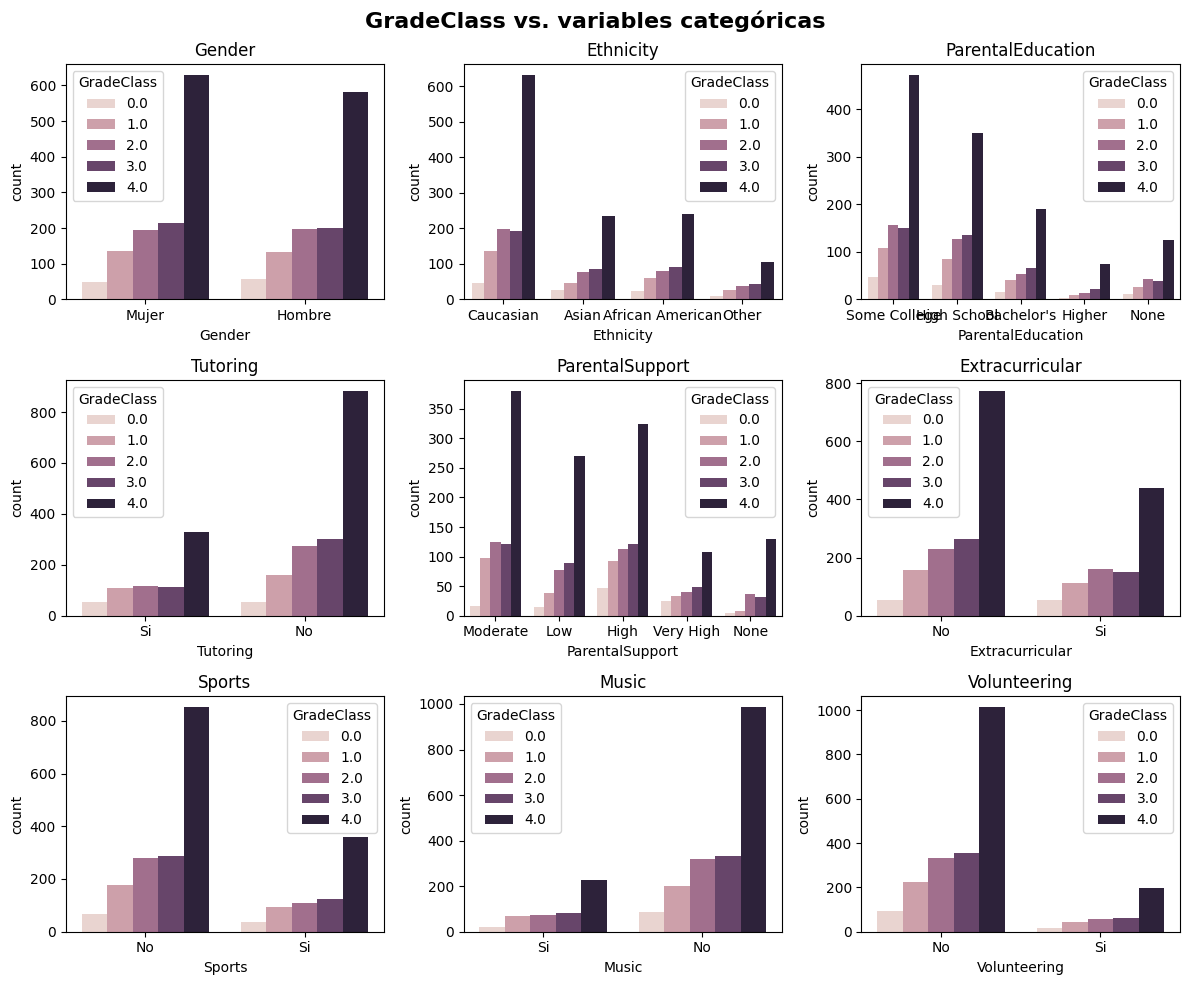

In [222]:
# Crear gráficos de barras para ver las proporciones de cada grado de las variables categóricas
fig, ax = plt.subplots(3,3, figsize=(12,10))
fig.suptitle('GradeClass vs. variables categóricas', fontweight='bold', fontsize=16)

# Recorrer la lista para ir creando los gráficos
for i, var in enumerate(labels_categoricas):
  fila = i // 3
  col = i % 3
  sns.countplot(x=var, hue='GradeClass', data=df_graficos, ax=ax[fila, col])
  ax[fila, col].set_title(var)

plt.tight_layout()
plt.show()

## **<u> Limpieza </u>**

## **<u> Aprendizaje Automático  </u>**

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor


#### Funciones

In [224]:
def compare_models(model_dict):
    results = []

    for name, (mse, r2, pred) in model_dict.items():
        stats = [name, mse, r2, pred]
        results.append(stats)
    # df_results = pd.DataFrame(results, columns=['Modelo', 'Error Cuadrático Medio (MSE)', 'Coeficiente de Determinación (R^2)', 'Predicciones'])
    df_results = pd.DataFrame(results, columns=['Modelo', 'MSE', 'R2', 'Predicciones'])
    return df_results

def gen_graph(x, y_pred, x_name, y_name, title):
    plt.figure(figsize=(14,7))

    sns.scatterplot(data=df, x=x_name, y=y_name)
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.title(title)
    plt.savefig('./graph/' + title + '.png')


#### Programa

### Regresion Lineal

In [225]:

# Función de regresión lineal
def regresion_lineal(x, y, x_n, y_n):
    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(x, y)

    # Hacer predicciones para todos los valores de X
    y_pred = model.predict(x)

    # Calcular métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Generar gráfico
    gen_graph(x, y_pred, x_n, y_n, 'Modelo de regresión lineal para predecir los resultados')
    return mse, r2, y_pred

### Regresión Polinómica

In [226]:
def regresion_polinomica(x, y, x_n, y_n):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=10)  # Cambiar degree para ajustar la complejidad del modelo
    x_poly = poly.fit_transform(x)

    # Crear el modelo de regresión polinómica
    poly_model = LinearRegression()

    # Ajustar el modelo a los datos
    poly_model.fit(x_poly, y)

    # Hacer predicciones
    y_poly_pred = poly_model.predict(x_poly)

    # Evaluar el modelo
    mse_poly = mean_squared_error(y, y_poly_pred)
    r2_poly = r2_score(y, y_poly_pred)

    gen_graph(x, y_poly_pred, x_n, y_n, 'Modelo de regresión polinómica para predecir los resultados')
    return mse_poly, r2_poly, y_poly_pred

### Regresión Ridge

In [227]:
def regresion_ridge(x, y, x_n, y_n):
    # Crear el modelo de regresión Ridge
    ridge_model = Ridge(alpha=1.0)  # Puedes ajustar alpha para regularización

    # Ajustar el modelo a los datos
    ridge_model.fit(x, y)

    # Hacer predicciones
    y_ridge_pred = ridge_model.predict(x)

    # Evaluar el modelo
    mse_ridge = mean_squared_error(y, y_ridge_pred)
    r2_ridge = r2_score(y, y_ridge_pred)

    gen_graph(x, y_ridge_pred, x_n, y_n, 'Modelo de regresión Ridge para predecir los resultados')
    return mse_ridge, r2_ridge, y_ridge_pred

### Regresion de Lasso

In [228]:
def regresion_lasso(x, y, x_n, y_n):
    # Crear el modelo de regresión Lasso
    lasso_model = Lasso(alpha=0.1)  # Puedes ajustar alpha para regularización

    # Ajustar el modelo a los datos
    lasso_model.fit(x, y)

    # Hacer predicciones
    y_lasso_pred = lasso_model.predict(x)

    # Evaluar el modelo
    mse_lasso = mean_squared_error(y, y_lasso_pred)
    r2_lasso = r2_score(y, y_lasso_pred)

    gen_graph(x, y_lasso_pred, x_n, y_n, 'Modelo de regresión Lasso para predecir los resultados')
    return mse_lasso, r2_lasso, y_lasso_pred

### Regresión KNN

In [229]:

def regresion_knn(x, y, x_n, y_n):
    # Crear el modelo de regresión KNN
    knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar n_neighbors

    # Ajustar el modelo a los datos
    knn_model.fit(x, y)

    # Hacer predicciones
    y_knn_pred = knn_model.predict(x)

    # Evaluar el modelo
    mse_knn = mean_squared_error(y, y_knn_pred)
    r2_knn = r2_score(y, y_knn_pred)

    gen_graph(x, y_knn_pred, x_n, y_n, 'Modelo de regresión KNN para predecir los resultados')
    return mse_knn, r2_knn, y_knn_pred

### Regresión con Árbol de Decisión

In [230]:

def decision_tree_regressor(x, y, x_n, y_n):
    # Crear el modelo de regresión con árbol de decisión
    tree_model = DecisionTreeRegressor(max_depth=5)  # Puedes ajustar max_depth

    # Ajustar el modelo a los datos
    tree_model.fit(x, y)

    # Hacer predicciones
    y_tree_pred = tree_model.predict(x)

    # Evaluar el modelo
    mse_tree = mean_squared_error(y, y_tree_pred)
    r2_tree = r2_score(y, y_tree_pred)

    gen_graph(x, y_tree_pred, x_n, y_n, 'Modelo de regresión con Árbol de Decisión para predecir los resultados')
    return mse_tree, r2_tree, y_tree_pred

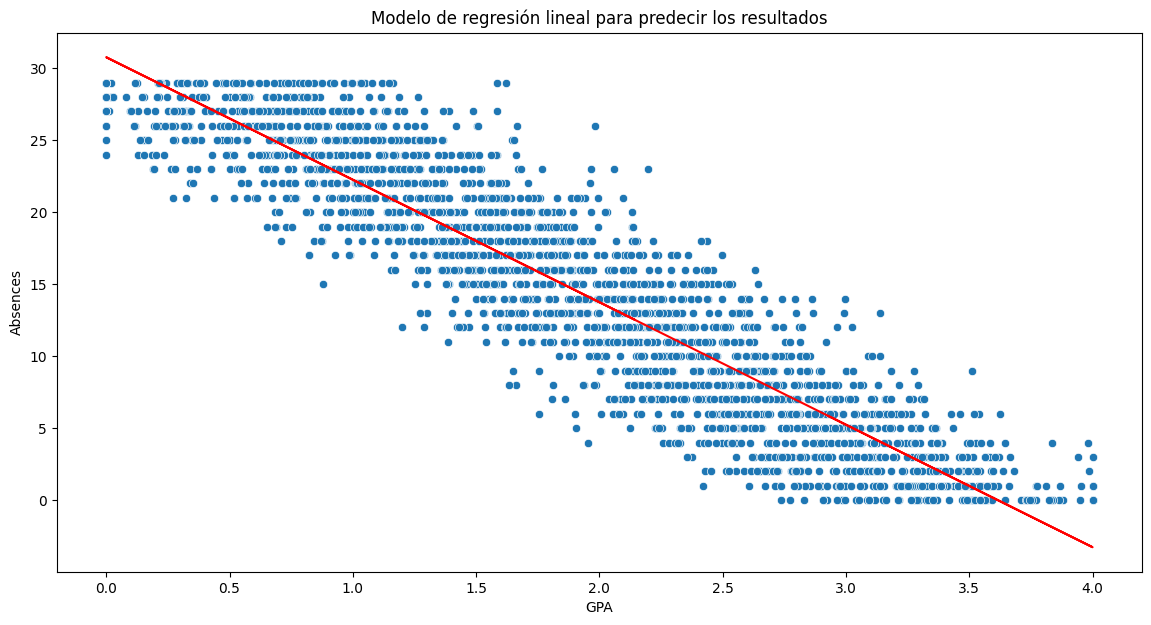

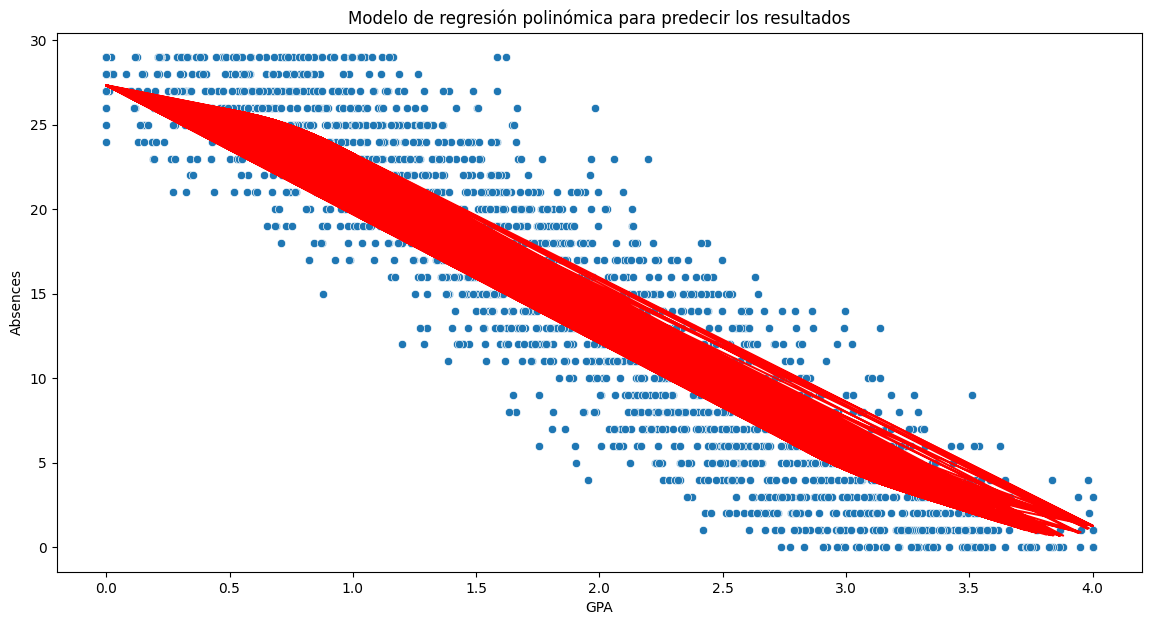

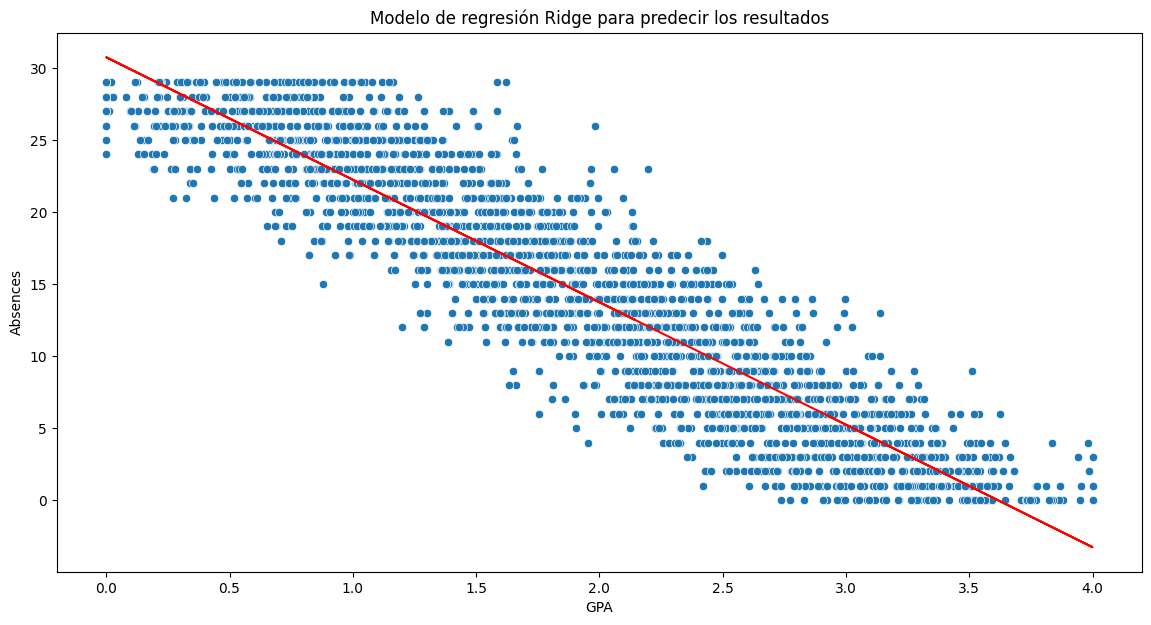

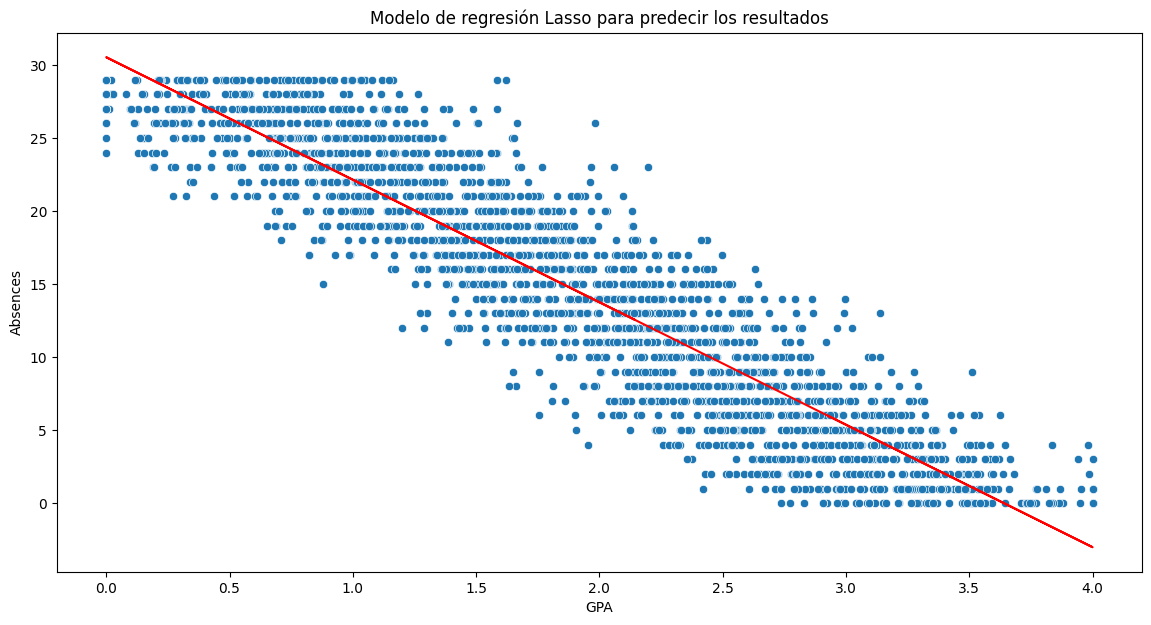

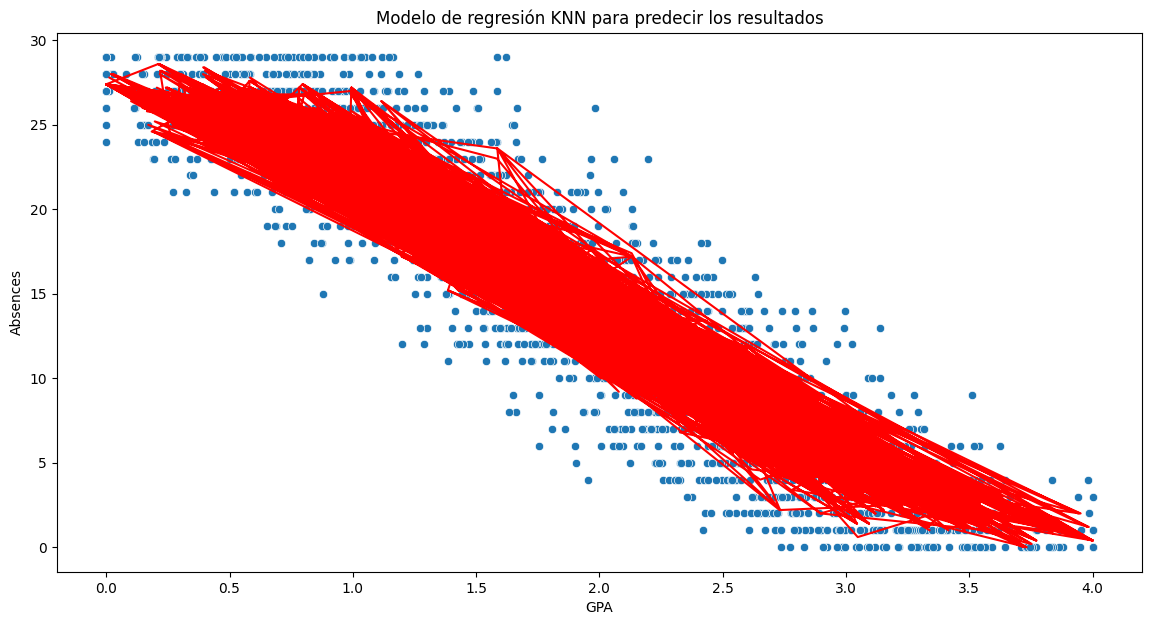

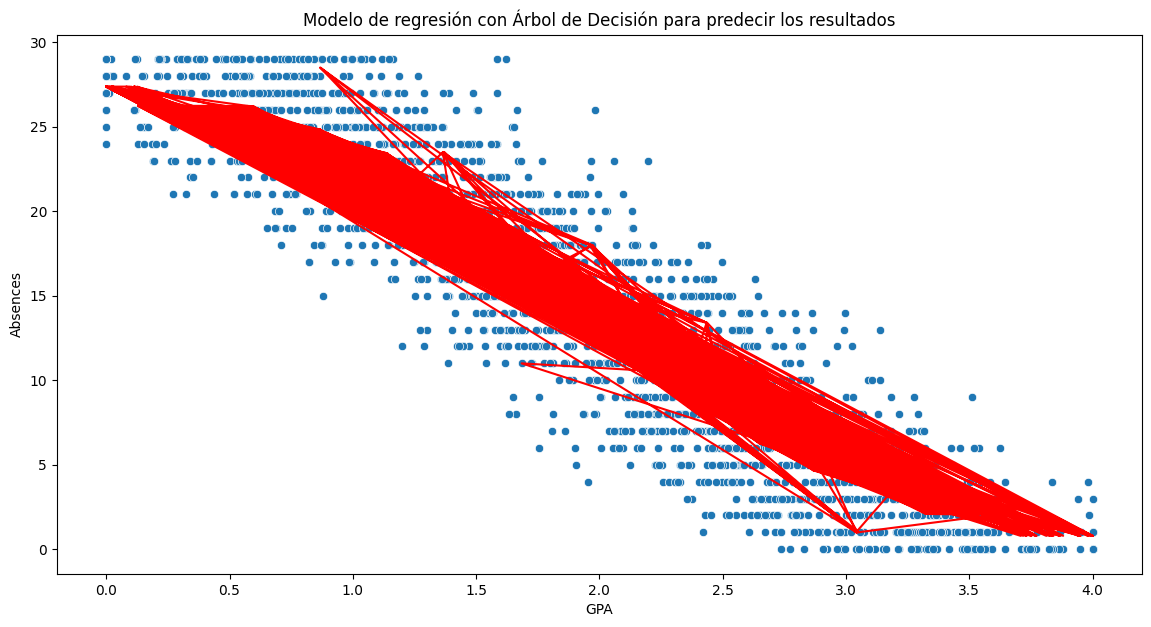

In [231]:
x_n = 'GPA'
y_n = 'Absences'

x = pd.Series(df[x_n])
y = pd.Series(df[y_n])


# Asegurar que x tenga dos dimensiones (n_samples, n_features)
x = x.values.reshape(-1, 1)

# Asegurar que y tenga dos dimensiones (n_samples, 1)
y = y.values.reshape(-1, 1)

models = {'Regresión Lineal': regresion_lineal(x, y, x_n, y_n),
              'Regresión Polinomica': regresion_polinomica(x, y, x_n, y_n),
              'Regresión Ridge': regresion_ridge(x, y, x_n, y_n),
              'Regresión Lasso': regresion_lasso(x, y, x_n, y_n),
              'Regresión KNN': regresion_knn(x, y, x_n, y_n),
              'Árbol de Decisión': decision_tree_regressor(x, y, x_n, y_n),
}

comparison = compare_models(models)

In [232]:
comparison

,Modelo,MSE,R2,Predicciones
0,Regresión Lineal,11.098563,0.845137,"[[5.839786817022009], [4.8725038266963985], [2..."
1,Regresión Polinomica,10.214574,0.857472,"[[5.024355534271436], [4.29797107359386], [26...."
2,Regresión Ridge,11.098578,0.845137,"[[5.844130045544631], [4.877329854993921], [29..."
3,Regresión Lasso,11.110508,0.844971,"[5.961986782735899, 5.008287723265433, 29.5831..."
4,Regresión KNN,8.126923,0.886602,"[[5.4], [1.4], [26.8], [11.2], [18.8], [4.0], ..."
5,Árbol de Decisión,9.754562,0.863891,"[4.647619047619048, 1.0, 27.379310344827587, 1..."


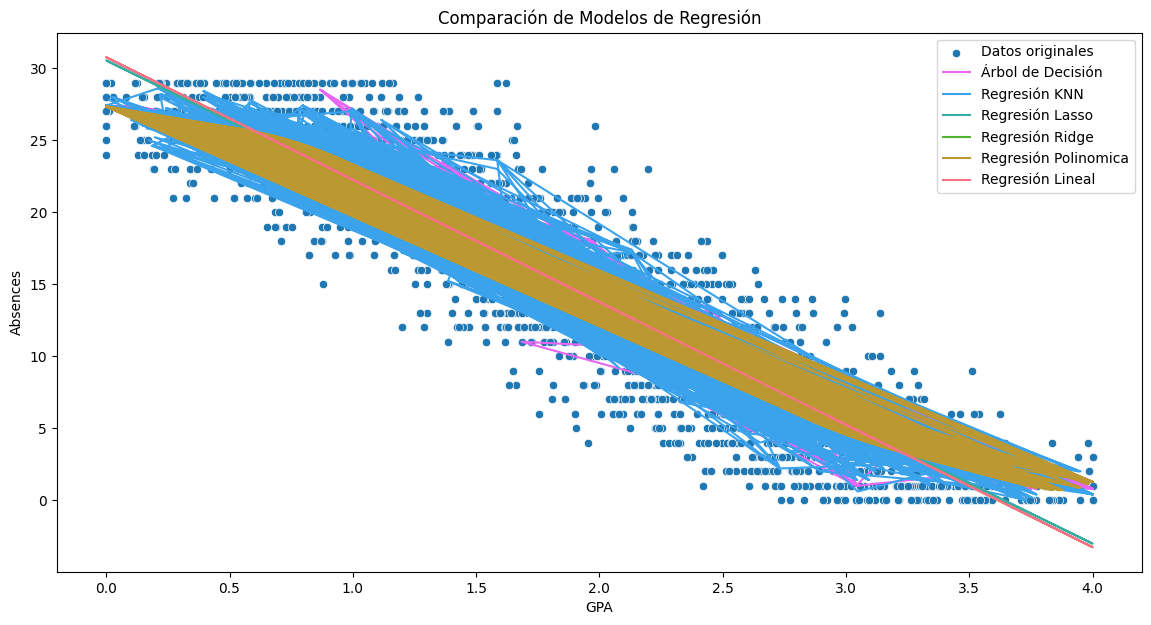

In [233]:
import random

# Cargar una paleta de colores de seaborn
palette = sns.color_palette("husl", n_colors=len(comparison))

def get_color(index):
    return palette[index]

comparison = comparison.iloc[::-1]

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x=x_n,  y=y_n, label='Datos originales')

# Agregar las predicciones de cada modelo
for index, row in comparison.iterrows():
    Modelo = row['Modelo']
    mse = row['MSE']
    r2 = row['R2']
    y_pred = row['Predicciones']
    # plt.plot(x, y_pred, color=random_color(), label=f'{Modelo} (MSE: {mse:.2f}, R2: {r2:.2f})')
    plt.plot(x, y_pred, color=get_color(index), label=f'{Modelo}')


plt.title('Comparación de Modelos de Regresión')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.legend()
plt.savefig('./graph/Comparacion_de_Modelos_de_Regression.png')
plt.show()

### Conclusiones

/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_3534/3891950567.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


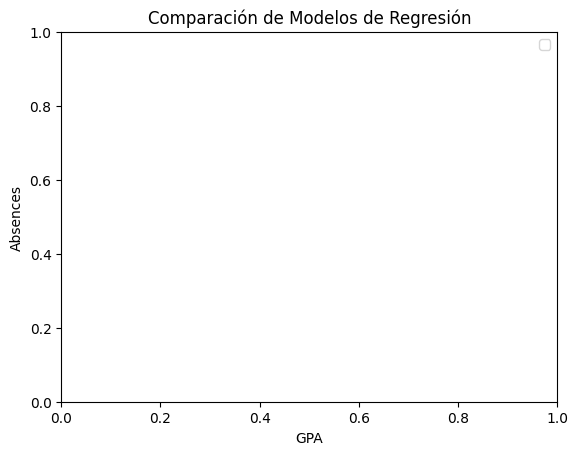

In [234]:
# plt.figure(figsize=(14, 7))
# sns.scatterplot(data=df, x='GPA', y='Absences', label='Datos originales')

# # Agregar las predicciones de cada modelo
# plt.plot(x, y_pred, color='blue', label='Regresión Lineal')
# plt.plot(x, y_poly_pred, color='red', linestyle='--', label='Regresión Polinómica')
# plt.plot(x, y_ridge_pred, color='green', linestyle='-.', label='Regresión Ridge')
# plt.plot(x, y_lasso_pred, color='purple', linestyle=':', label='Regresión Lasso')
# plt.plot(x, y_knn_pred, color='orange', linestyle='-', label='Regresión KNN')
# plt.plot(x, y_tree_pred, color='brown', linestyle='-', label='Regresión con Árbol de Decisión')

plt.title('Comparación de Modelos de Regresión')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.legend()
plt.savefig('./graph/Comparacion_de_Modelos_de_Regression.png')
plt.show()